In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import pandas as pd

本模块的函数族旨在快速绘制误差的空间分布情况。在浏览本模块函数说明之前可先参阅函数设计的[关键技术思想](https://www.showdoc.cc/meteva?page_id=4072178802924517)。本模块包含数值型检验指标的计算方法，为对其进行介绍，以下先对测试数据进行一个简单的介绍。

### 测试数据集：  
 **数据范围** ： 为了减少测试数据量又说明问题，仅截取了110 - 120°E， 25 -35°N范围内的观测和预报数据。  
 **观测数据** ： 2020年3月23日至26日2m温度观测数据，时间间隔3小时  
 **预报数据** ：  
    **ECMWF：** 2020年3月23日08时至23日08时的0至72小时时效2m温度预报数据，起报时间间隔为12小时，预报时效间隔为3小时  
    **GRAPES_GFS：** 2020年3月23日08时至23日08时的0至72小时时效2m温度预报数据，起报时间间隔为12小时，预报时效间隔为3小时  


In [2]:
sta_all = pd.read_hdf(r"H:\test_data\input\mpd\program_error_scatter_test.h5","df")

# 误差站点分布图   
**me_scatter(sta_ob_and_fos,s= None,g = None,gll = None, save_dir=None,save_path = None,show = False, print_max = 1,threshold = 0,add_county_line = False,map_extend = None,title="误差站点分布图"):**  
根据输入的站点数据，选择部分数据，误差站点分布图  


# 绝对误差站点分布图 
**mae_scatterr(sta_ob_and_fos,s= None,g = None,gll = None, save_dir=None,save_path = None,show = False, print_max = 1,threshold = 0,add_county_line = False,map_extend = None,title="绝对误差站点分布图"):**  
根据输入的站点数据，选择部分数据，误差站点分布图 

# 均方根误差站点分布图 
**mae_scatterr(sta_ob_and_fos,s= None,g = None,gll = None, save_dir=None,save_path = None,show = False, print_max = 1,threshold = 0,add_county_line = False,map_extend = None,title="均方根误差站点分布图"):**  
根据输入的站点数据，选择部分数据，误差站点分布图 


|参数|说明（上述两个函数参数意义和用法完全相同）|  
|:--|:--|  
|**sta_ob_and_fos**|实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的sta_all|             
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**g**|用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>g</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|     
|**gll**| 用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>gll</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|  
|**save_dir**| 图片输出文件夹，文件的路径将据此自动生成|  
|**save_path**| 图片输出文件路径（仅适合只输出一张图片结果的情况）|  
|**show**| 是否在屏幕显示图片，如果save_path 和save_dir 为都None时，程序内部会自动将show设置True|  
|**print_max**| 在平面上打印误差绝对值排名前print_max的站点的信息|  
|**threshold**| 在图片显示时，为了突出显示误差较大的站点，将误差小于threshold的站点以更小的尺寸显示|  
|**add_county_line**| 绘制底图时是否添加县界|  
|**map_extend**|底图的范围,缺省时自动根据站点数据的范围确定底图范围，不缺省时采用[slon,elon,slat,elat] 列表作为参数，也可也接受[网格信息类变量](https://www.showdoc.cc/meteva?page_id=3975600815874861)作为地图范围的参数|  
|**title**|指定图片标题|  
|<font face="黑体" color=blue size=3>return</font>|无返回值|  
  
**调用示例：**

误差绝对值前1的站点：
id:57359   lon:110.73  lat:31.35 value:-6.288272


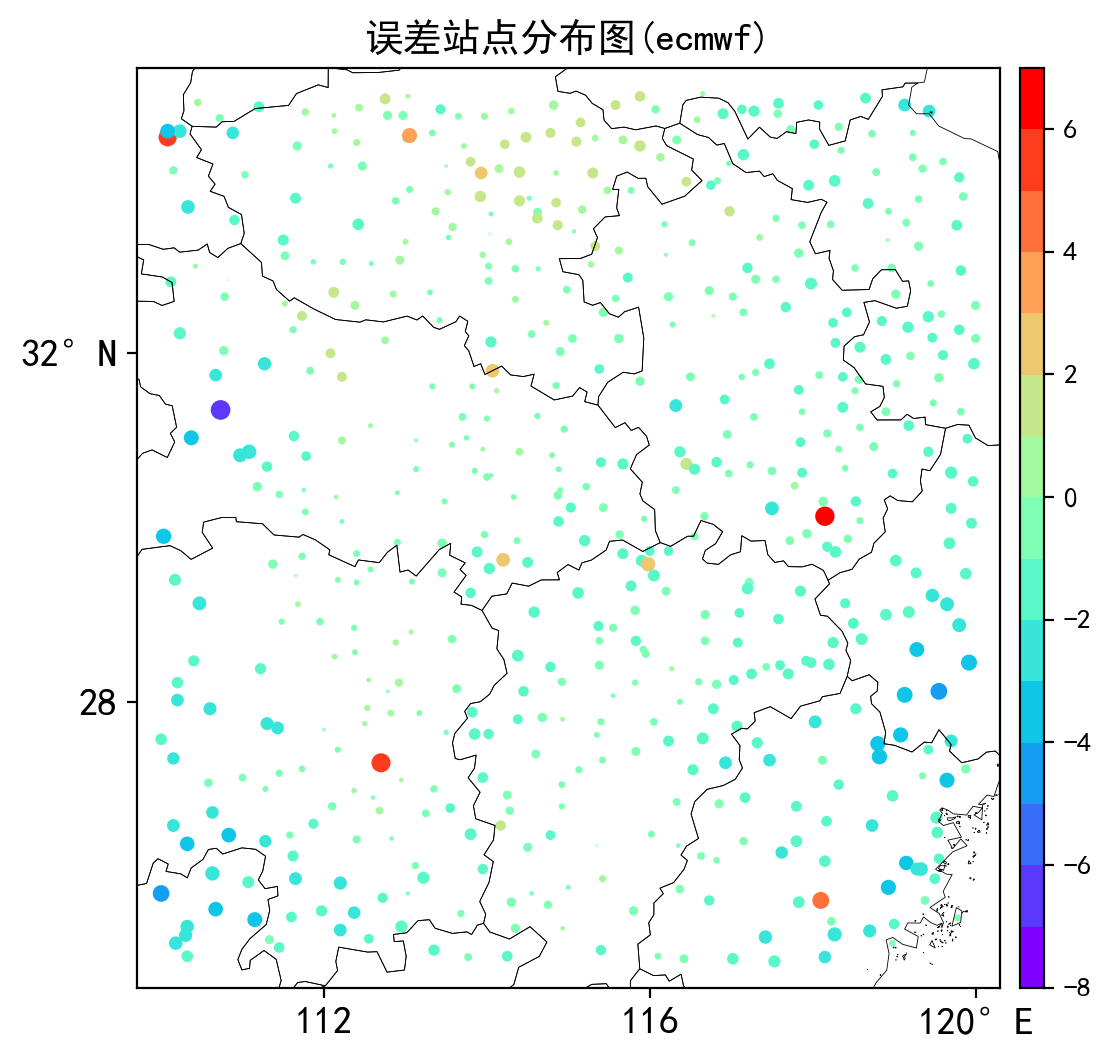

图片输出至H://误差站点分布图(ecmwf).png
误差绝对值前1的站点：
id:57355   lon:110.37  lat:31.03 value:-6.654348


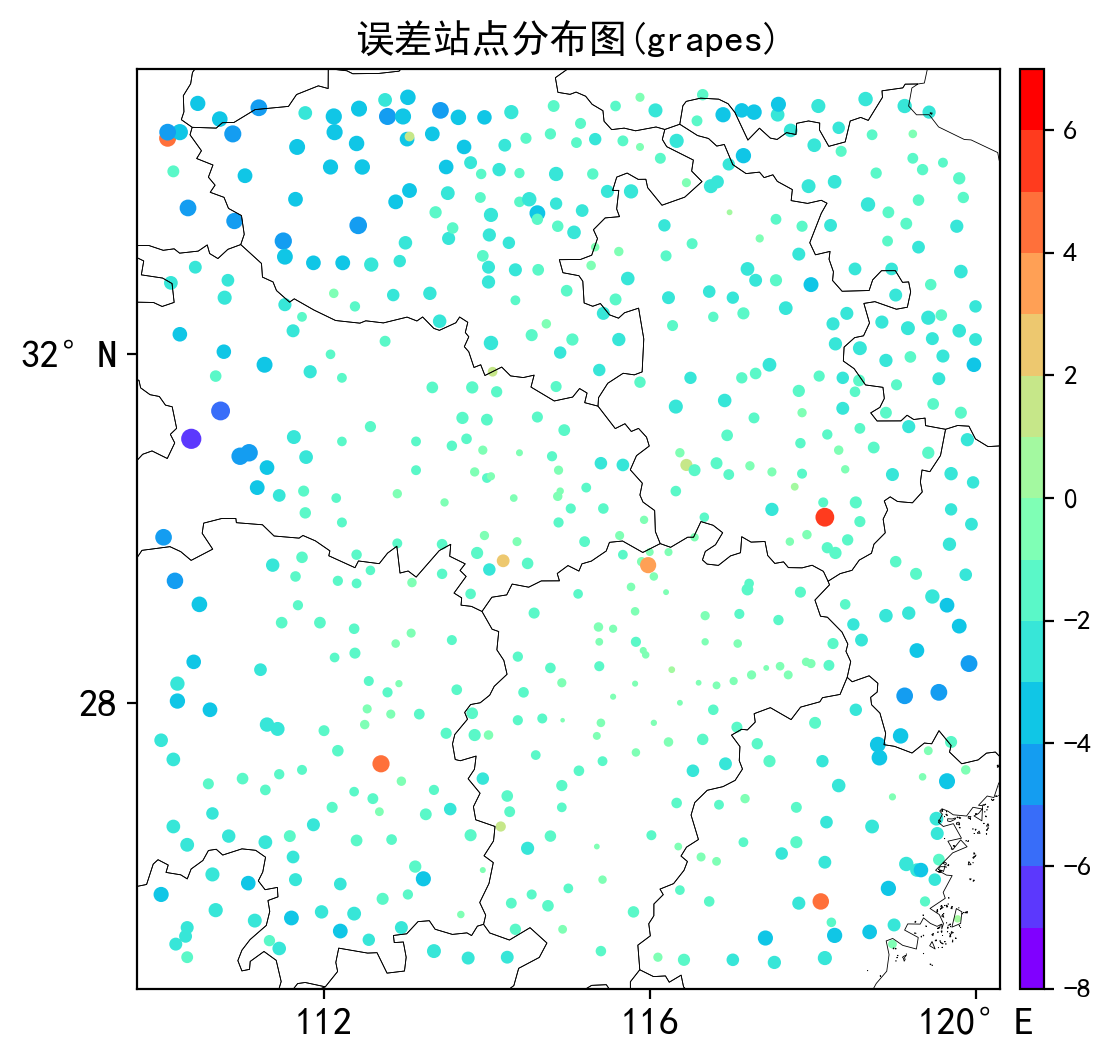

图片输出至H://误差站点分布图(grapes).png


In [3]:
mpd.me_scatter(sta_all,save_dir = r"H:/",show = True)  #对所有的样本进行分析，对于一个站点而言，不同起报时间和预报时效的样本被放在一起检验

在上述结果中，站点上误差的大小会以站点的颜色来代表；同时误差的绝对值会以散点的面积来代表，面积越大的代表误差也越大。这样能够突出显示误差较大的站点，便于我们分析问题。如果这种方式还不够突出，可以进一步设置threshold参数来突出显示误差较大的站点。

误差绝对值前1的站点：
id:57359   lon:110.73  lat:31.35 value:-6.288272


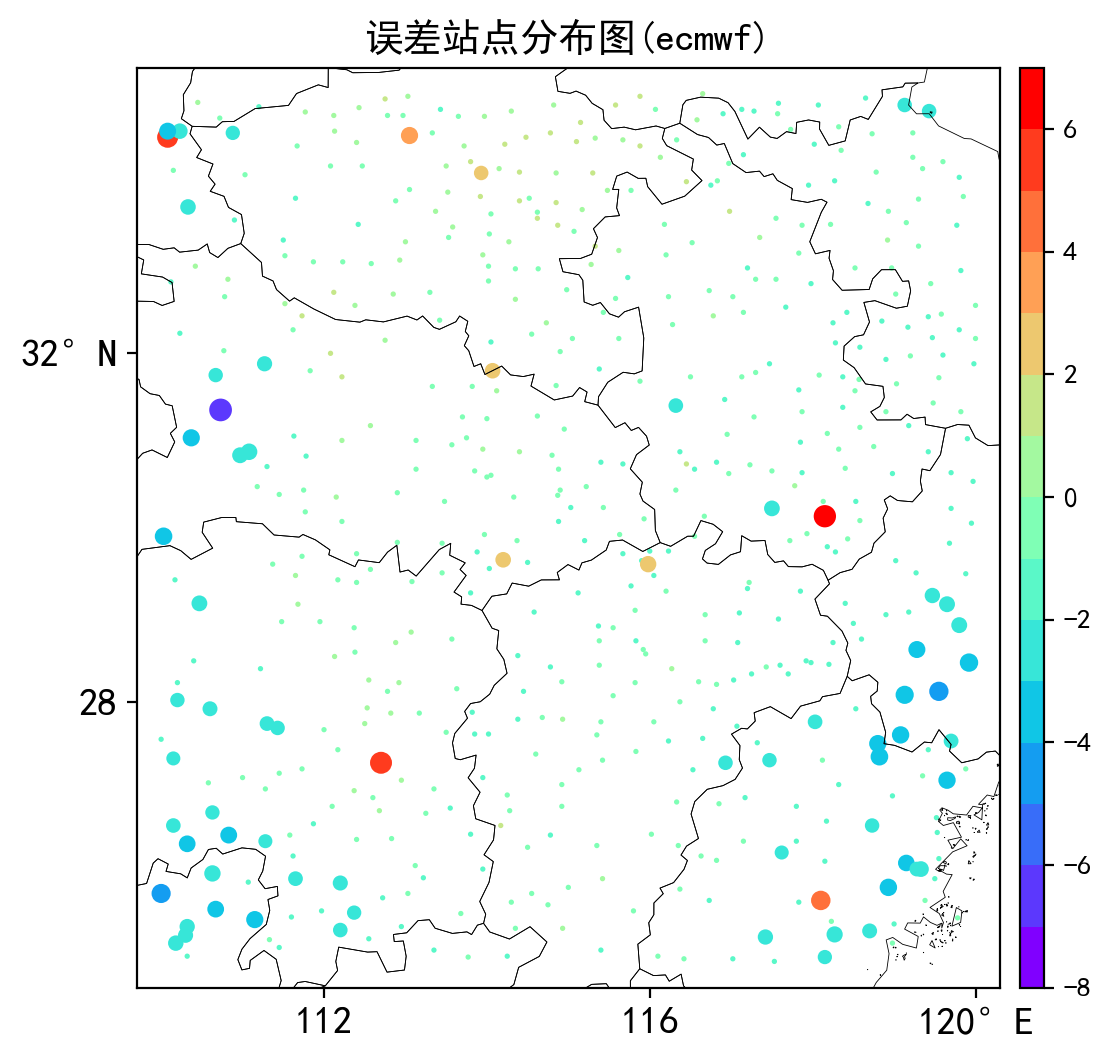

In [5]:
#为了突出显示温度误差较大的点，将误差绝对值小于2度的站点的绘图尺寸统一设置为一个很小的常数
mpd.me_scatter(sta_all,s = {"member":["ob","ecmwf"]},threshold = 2) 

在上述分析中默认print_max = True, 因此会自动打印哪个站点的误差绝对值最大。这样方便快对有问题的预报进行更详细的研究。比如上面的例子中我们看到湖北西部、湖南中部和安徽南部有几个温度预报偏差比较大的点。但是自动打印的只有一个站点，如果想知道湖南中部那个异常点的站号，可以通过设置print_max来解决。

In [ ]:
mpd.me_scatter(sta_all,s = {"member":["ob","ecmwf"]},print_max = 4)  
#通过打印更多误差大值信息，可以锁定湖南中部误差最大的点站号为57776

如果我们关注的局部的误差较大点在全局的排名很靠后，光靠print_max也不太方便。这是可以运行s参数选择部分数据，缩小分析的范围。例如我们如果想锁定福建中部误差最大值的站号，可以用如下方式实现

In [ ]:
mpd.me_scatter(sta_all,s = {"lon":[117,120],"lat":[25,27],"member":["ob","ecmwf"]},add_county_line = True) 
#在分析小范围的误差误差时，加上县界更便于定位，此时可以选择add_county_line = True

In [ ]:
grid =meb.grid([117,120,1],[25,27,1]) #选取部分区也可以采用grid参数来实现
mpd.me_scatter(sta_all,s = {"grid":grid,"member":["ob","ecmwf"]},g = "ob_hour",gll = [[2,8],[14,20]],save_dir = r"H:/",show = True)

In [ ]:
#上述函数的参数对mae_scatter以及rmse_scatter的使用方法是类似的，示例效果如下
mpd.mae_scatter(sta_all,s = {"member":["ob","ecmwf"]},threshold = 2,map_extend = [108,122,24,36]) 

由于一个行政区内的站点的可能距离行政区边缘有一定距离，所以自动绘制的地图范围可能不能完全覆盖用户想要覆盖的行政范围，此时可以用map_extend参数来指定地图的范围，方式如上所示。或者采用在编程过程中已经定义过一个包含了区域范围的网格信息类变量，则也可以将网格信息类变量直接作为参数，示例如下：

In [ ]:
grid1 =meb.grid([108,122,1],[24,36,1]) #选取部分区也可以采用grid参数来实现
mpd.rmse_scatter(sta_all,s = {"member":["ob","ecmwf"]},threshold = 2,map_extend = grid1) 